# Assessed Problem #3

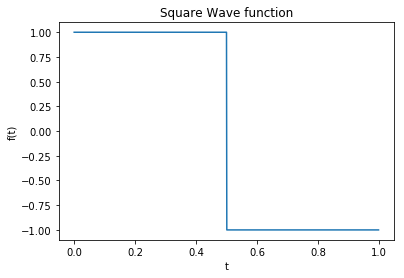

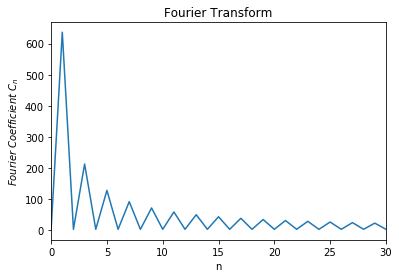

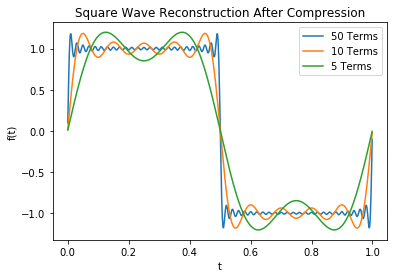

In [2]:
#Libraries
from numpy import arange, sin, pi
from numpy.fft import rfft, irfft
from matplotlib.pyplot import plot, show, legend, title, xlabel, ylabel, xlim
#

#Subroutines
def SqWave(t): #Defines the square-wave function described in the problem
    for i in range(len(t)): #For each value of the array
        if sin(t[i]*2*pi)%2 < 1: t[i] =  1 #if The sine(2pi*t) function has a remainder from two less than one then floor(2t) is even
        else: #if not 
            if sin(t[i]*2*pi)%2 > 1: t[i] = -1 #test if the sine(2pi*t) function has a remainder more than one then floor(2t) is odd
            else: t[i] = t[i-1] #unless t[i] is a value of (2n+1)pi where it should continue the trend of what value came before it
                #this is an unwanted side affect of how I defined the function. It doesn't affect the calculation
                #but has made the function a little harder to understand intuitively
    return t #Returns the modified array


def SetToZero(A,n): #returns the input array 'A' with all values but the first 'n' terms set to zero
    for i in range(len(A)-n): 
        A[i+n] = 0
    return A
#

#Computation
N = 1000. # Number of values in the range
n = 1. #Maximum value of the range
plot(arange(0,n,n/N),SqWave(arange(0,n,n/N)))
title("Square Wave function")
xlabel("t")
ylabel("f(t)")
show()
c=rfft(SqWave(arange(0,n,n/N))) #Calculate the fourier coefficients of the square wave function in the range
plot(abs(c))
title("Fourier Transform")
xlabel("n")
ylabel("$Fourier \ Coefficient \ C_n$")
xlim(0,30)
show()

for i in [50,10,5]:
    plot(arange(0,n,n/N),irfft(SetToZero(c, i)), label = str(i) + " Terms") #Reverse the fourier transform for each the compressed arrays
title("Square Wave Reconstruction After Compression")
xlabel("t")
ylabel("f(t)")
legend()
show()
#